In [24]:
import sys
sys.path.append('../../')
sys.path.append('../../../flaming-choripan')

In [25]:
from flamingchoripan.files import search_for_filedirs
from lchandler import C_

root_folder = '/home/opimentel/tesis/astro-lightcurves-handler/save'
filedirs = search_for_filedirs(root_folder, fext=C_.EXT_RAW_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (/home/opimentel/tesis/astro-lightcurves-handler/save)
(0) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe.rawlcd - 0.931[mbs]
(1) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe.rawlcd - 0.630[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────
filedirs after searching with filters: (/home/opimentel/tesis/astro-lightcurves-handler/save)
(0) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe.rawlcd - 0.931[mbs]
(1) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe.rawlcd - 0.630[mbs]
─────────────────────────────────────────────────────────────────────────────────────────

In [26]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.progress_bars import ProgressBar
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir
from lchandler import C_

def load_lcdataset(filedir):
    assert filedir.split('.')[-1]==C_.EXT_RAW_LIGHTCURVE
    return load_pickle(filedir)

filedir = '/home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe.rawlcd'
filedir = '/home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe.rawlcd'

filedic = get_dict_from_filedir(filedir)
root_folder = filedic['*rootdir*']
cfilename = filedic['*cfilename*']
lcdataset = load_lcdataset(filedir)
print(lcdataset['raw'].keys())
print(lcdataset['raw'].get_random_lcobj(False).keys())
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
> loading: /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe.rawlcd
dict_keys(['data', 'survey', 'description', 'band_names', 'class_names', 'obs_is_flux'])
dict_keys(['days', 'obs', 'obse', 'y'])
LCDataset(
(raw - samples 628)
 - samples: 628 - obs samples: 25,745 (g: 11,424 - r: 14,321)
 - max_length_serial: 604 - max_duration: 538.80[days] - median_cadence: {'g': 3.00390625, 'r': 2.984375}
   |▎       | SLSN - 20/628 (3.18%)
   |█████▋  | SNIa - 449/628 (71.50%)
   |▍       | SNIbc - 32/628 (5.10%)
   |█▌      | merSNII - 127/628 (20.22%)
)


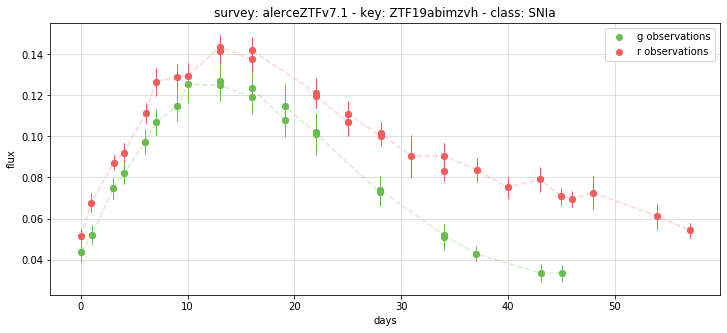

In [4]:
import flamingchoripan.lists as lists
import matplotlib.pyplot as plt
from lchandler.plots.lc import plot_lightcurve

lcset = lcdataset['raw']
lcobj, key = lcset.get_random_lcobj()
fig, ax = plt.subplots(1,1, figsize=(12,5))
for kb,b in enumerate(lcset.band_names):
    plot_lightcurve(ax, lcobj, b, label=f'{b} observations')
ax.set_title(f'survey: {lcset.survey} - key: {key} - class: {lcset.class_names[lcobj.y]}')
ax.set_xlabel('days')
ax.set_ylabel('flux')
ax.legend()
ax.grid(alpha=0.5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[]

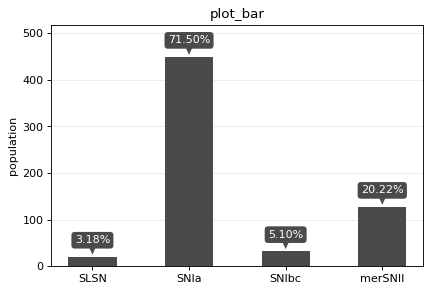

In [27]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import flamingchoripan.cuteplots.plots as cplots
import flamingchoripan.cuteplots.colors as cc

cmap = cc.colorlist_to_cmap([cc.NICE_COLORS_DICT['nice_gray']])
labels = lcdataset['raw'].get_lcobj_classes()
fig, ax = cplots.plot_hist_labels(labels, lcdataset['raw'].class_names, cmap=cmap)
plt.plot()

In [28]:
%load_ext autoreload
%autoreload 2

new_sets = {
    'raw_train':0.8,
    'raw_val':0.2,
    #'raw_test':0.1,
}
lcdataset.split('raw', new_sets)
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
LCDataset(
(raw - samples 628)
 - samples: 628 - obs samples: 25,745 (g: 11,424 - r: 14,321)
 - max_length_serial: 604 - max_duration: 538.80[days] - median_cadence: {'g': 3.00390625, 'r': 2.984375}
   |▎       | SLSN - 20/628 (3.18%)
   |█████▋  | SNIa - 449/628 (71.50%)
   |▍       | SNIbc - 32/628 (5.10%)
   |█▌      | merSNII - 127/628 (20.22%)
(raw_train - samples 501)
 - samples: 501 - obs samples: 20,429 (g: 8,970 - r: 11,459)
 - max_length_serial: 604 - max_duration: 538.80[days] - median_cadence: {'g': 3.00390625, 'r': 2.98828125}
   |▎       | SLSN - 16/501 (3.19%)
   |█████▋  | SNIa - 359/501 (71.66%)
   |▍       | SNIbc - 25/501 (4.99%)
   |█▌      | merSNII - 101/501 (20.16%)
(raw_val - samples 127)
 - samples: 127 - obs samples: 5,316 (g: 2,454 - r: 2,862)
 - max_length_serial: 364 - max_duration: 408.00[days] - median_cadence: {'g': 3.00390625, 'r': 2.98046875}
   |▎       | SLSN - 4/

In [30]:
%load_ext autoreload
%autoreload 2

sigma_clipping_kwargs = {
    'sigma_n':1,
    'sigma_m':5, # 1, 3, 5
    'apply_lower_bound':False,
    'verbose':0,
}
for ks,set_name in enumerate(['raw_train', 'raw_val']):
    lcdataset.sigma_clipping(set_name, set_name.replace('raw_',''), **sigma_clipping_kwargs)

print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
LCDataset(
(raw - samples 628)
 - samples: 628 - obs samples: 25,745 (g: 11,424 - r: 14,321)
 - max_length_serial: 604 - max_duration: 538.80[days] - median_cadence: {'g': 3.00390625, 'r': 2.984375}
   |▎       | SLSN - 20/628 (3.18%)
   |█████▋  | SNIa - 449/628 (71.50%)
   |▍       | SNIbc - 32/628 (5.10%)
   |█▌      | merSNII - 127/628 (20.22%)
(raw_train - samples 501)
 - samples: 501 - obs samples: 20,429 (g: 8,970 - r: 11,459)
 - max_length_serial: 604 - max_duration: 538.80[days] - median_cadence: {'g': 3.00390625, 'r': 2.98828125}
   |▎       | SLSN - 16/501 (3.19%)
   |█████▋  | SNIa - 359/501 (71.66%)
   |▍       | SNIbc - 25/501 (4.99%)
   |█▌      | merSNII - 101/501 (20.16%)
(raw_val - samples 127)
 - samples: 127 - obs samples: 5,316 (g: 2,454 - r: 2,862)
 - max_length_serial: 364 - max_duration: 408.00[days] - median_cadence: {'g': 3.00390625, 'r': 2.98046875}
   |▎       | SLSN - 4/

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


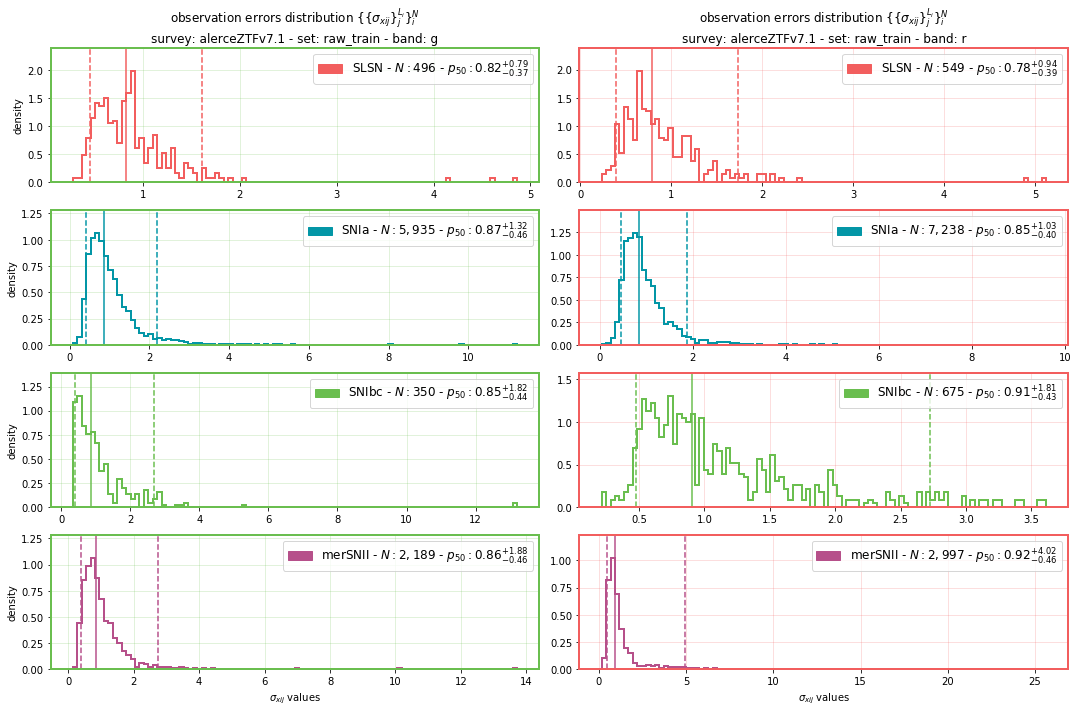

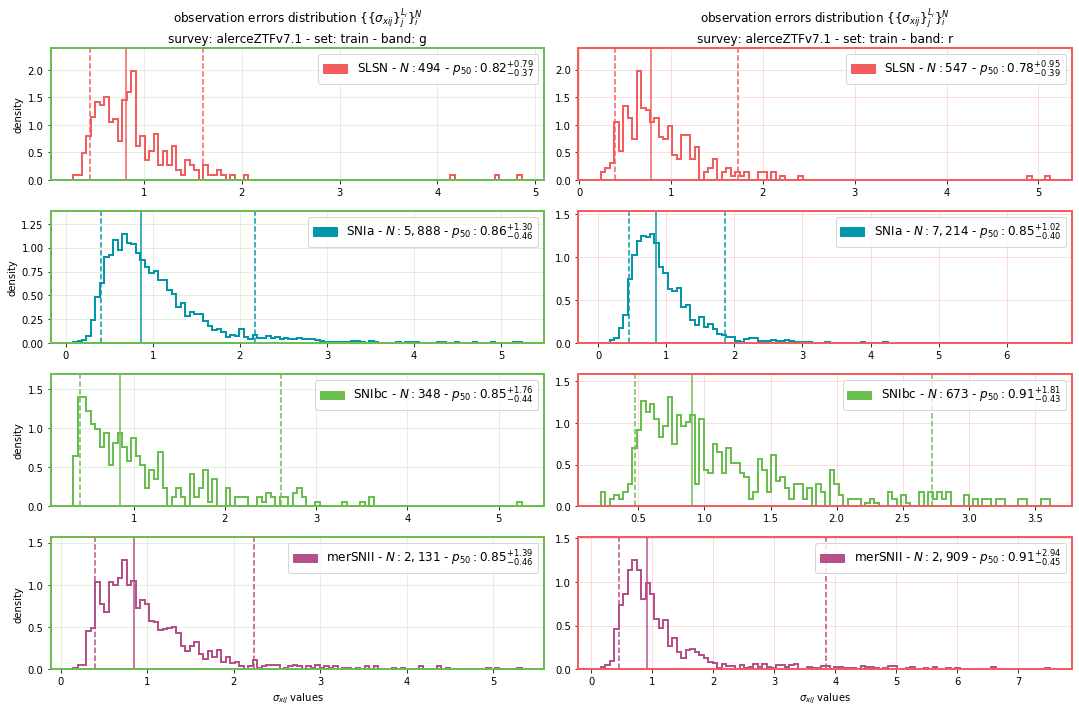

In [31]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.plots import plot_sigma_distribution

plot_sigma_distribution(lcdataset, 'raw_train')
plot_sigma_distribution(lcdataset, 'train')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


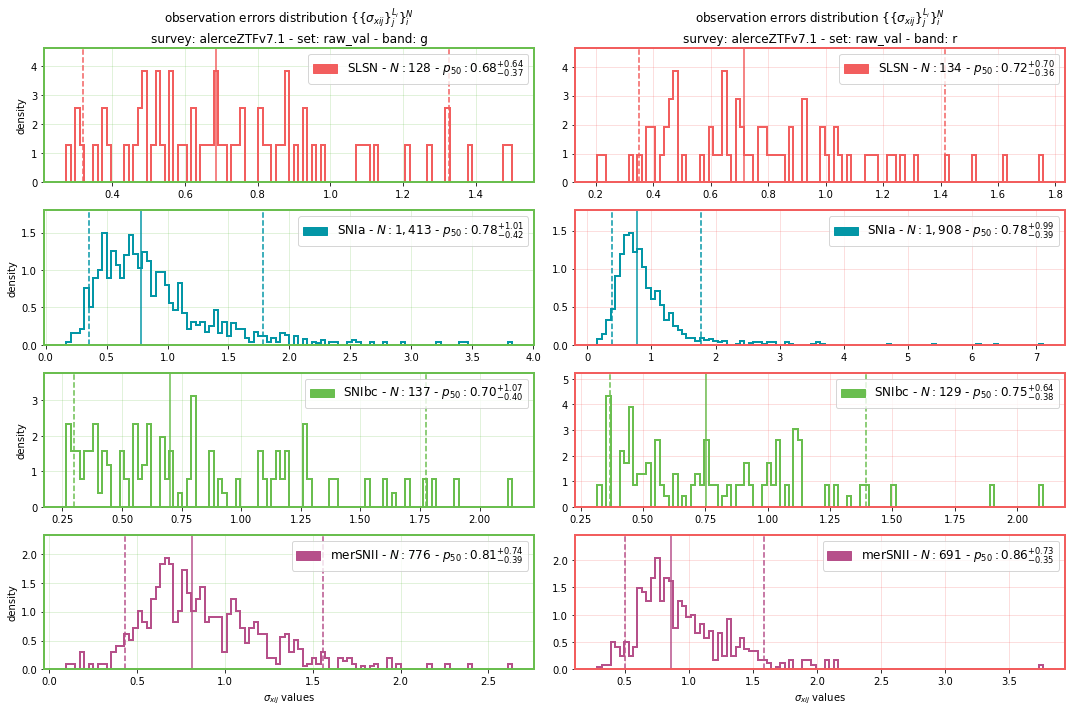

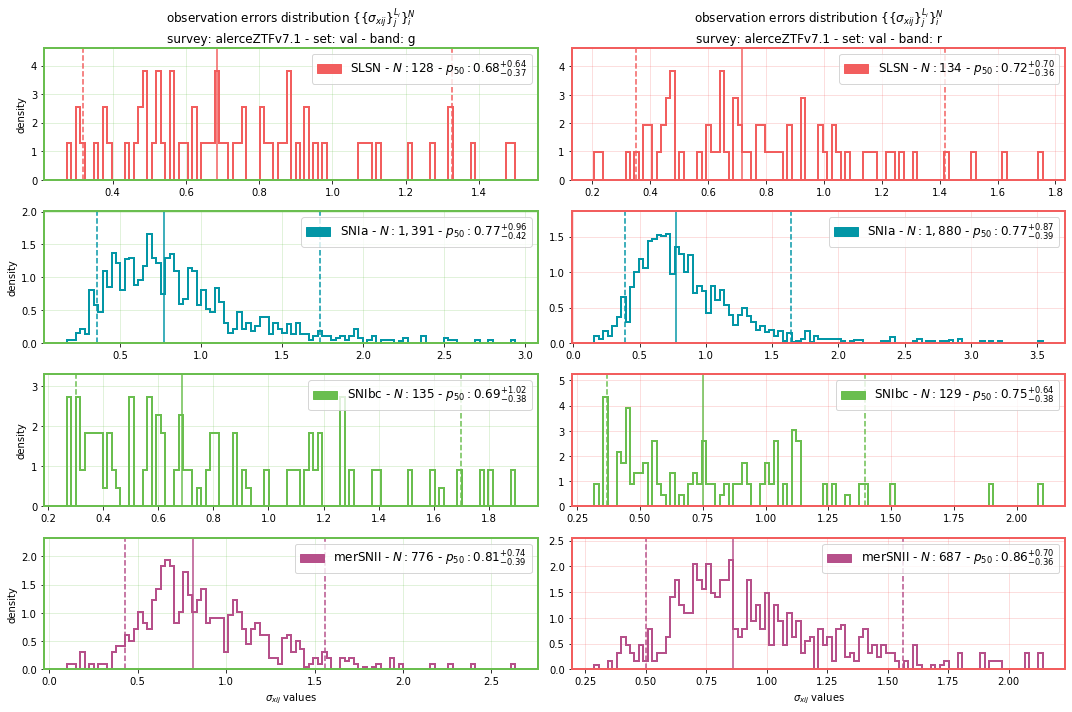

In [32]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.plots import plot_sigma_distribution

plot_sigma_distribution(lcdataset, 'raw_val')
plot_sigma_distribution(lcdataset, 'val')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


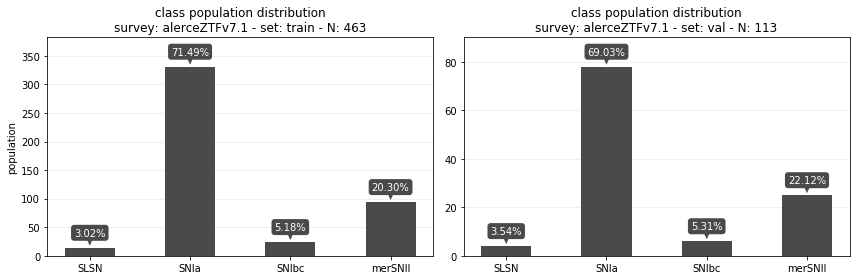

In [33]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.bars import plot_class_distribution

plot_class_distribution(lcdataset, 'train', 'val')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


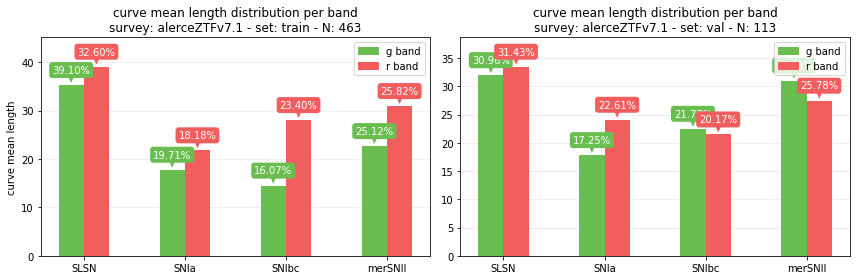

In [34]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.bars import plot_mean_length_distribution

plot_mean_length_distribution(lcdataset, 'train', 'val')

In [35]:
from flamingchoripan.files import load_pickle, save_pickle
from lchandler import C_

kfid = 0
new_cfilename = f'{cfilename}_kfid-{kfid}'
save_filedir = f'{root_folder}/{new_cfilename}.{C_.EXT_SPLIT_LIGHTCURVE}'
save_pickle(save_filedir, lcdataset)

> saving: /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.slcd


'/home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.slcd'